In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = "kmeans_data.csv"
df = pd.read_csv(data_path)

In [5]:
df = df.apply(pd.to_numeric, errors='coerce')

In [7]:
df = df.dropna()

In [9]:
X = df.to_numpy()

In [11]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [13]:
def k_means(X, k, max_iters=100):
    np.random.seed(42)  # For reproducibility
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

In [15]:
labels_2, centroids_2 = k_means(X, k=2)
labels_3, centroids_3 = k_means(X, k=3)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21984\1321652487.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


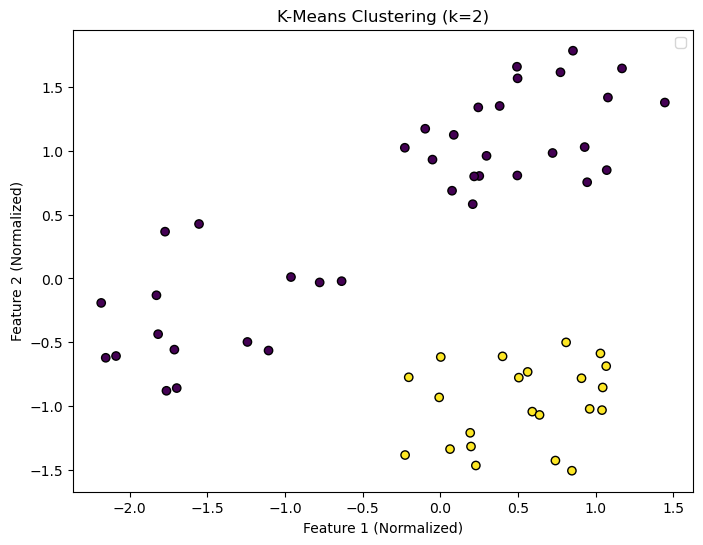

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_2, cmap='viridis', marker='o', edgecolor='k')

plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('K-Means Clustering (k=2)')
plt.legend()
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21984\3591463489.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


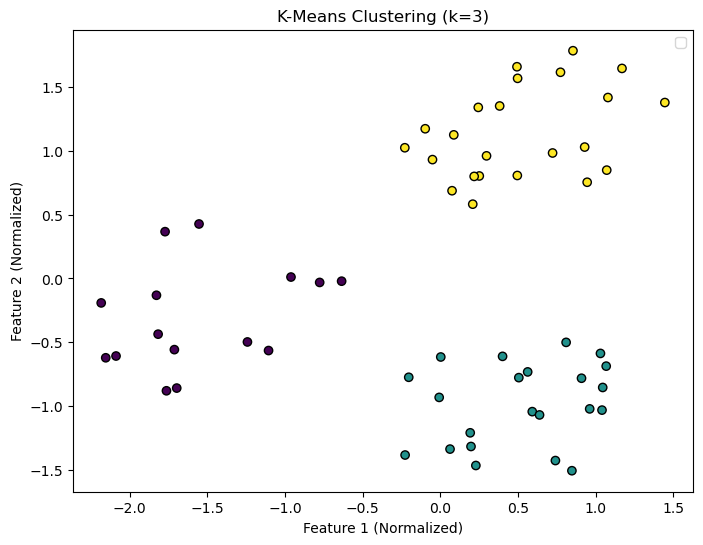

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_3, cmap='viridis', marker='o', edgecolor='k')

plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('K-Means Clustering (k=3)')
plt.legend()
plt.show()